In [14]:
import sys
import torch.nn as nn
import torch
import warnings
import re
import collections
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
from torchsummary import summary
warnings.filterwarnings("ignore")

class TimeMachine(d2l.DataModule):
    def _download(self):
        fname = d2l.download(d2l.DATA_URL + 'timemachine.txt', self.root,
                             '090b5e7e70c295757f55df93cb0a180b9691891a')
        with open(fname) as f:
            return f.read()
        
    def _preprocess(self, text):
        return re.sub('[^A-Za-z]+', ' ', text).lower()
    
    def _tokenize(self, text):
        return list(text)
    
class Vocab:
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        if tokens and isinstance(tokens[0], list):
            tokens = [token for line in tokens for token in line]
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x:x[1], reverse=True)
        self.idx_to_token = list(sorted(set(['<unk>']+reserved_tokens+[token for token, freq in self.token_freqs if freq >= min_freq])))
        self.token_to_idx ={token: idx for idx, token in enumerate(self.idx_to_token)}
        
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
    
    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
            return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]

    def unk(self):  # Index for the unknown token
        return self.token_to_idx['<unk>']

# 1. In the experiment of this section, tokenize text into words and vary the min_freq argument value of the Vocab instance. Qualitatively characterize how changes in min_freq impact the size of the resulting vocabulary.

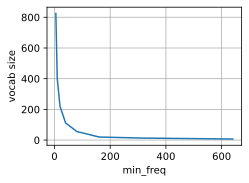

In [34]:
data = TimeMachine()
raw_text = data._download()
text = data._preprocess(raw_text)
words = text.split()
tokens = data._tokenize(words)
min_freqs = d2l.gen_logrithm_nums(initial_value = 5, growth_factor = 2, num_elements = 8)
vocab_lens = []
for min_freq in min_freqs:
    vocab = Vocab(tokens, min_freq=min_freq)
    vocab_lens.append(vocab.__len__())
d2l.plot(min_freqs, vocab_lens, 'min_freq', 'vocab size')

# 2. Estimate the exponent of Zipfian distribution for unigrams, bigrams, and trigrams in this corpus.

# 3. Find some other sources of data (download a standard machine learning dataset, pick another public domain book, scrape a website, etc). For each, tokenize the data at both the word and character levels. How do the vocabulary sizes compare with The Time Machine corpus at equivalent values of min_freq. Estimate the exponent of the Zipfian distribution corresponding to the unigram and bigram distributions for these corpora. How do they compare with the values that you observed for The Time Machine corpus?